# 图像的掩码

> 计算机图像处理中经常会用到**掩码** (mask) 的概念. 掩码本质上就是一个集合.

首先我们加载所需要的库, rembg是一个基于AI模型进行背景去除的库(该算法主要基于Unet神经网络), 需要事先安装好, 例如可以使用如下命令:

'''
pip install rembg
'''

In [1]:

#AI自动去背景
from PIL import Image
import numpy as np
import rembg
import matplotlib.pyplot as plt

接下来我们载入一张卡皮巴拉的集体照.

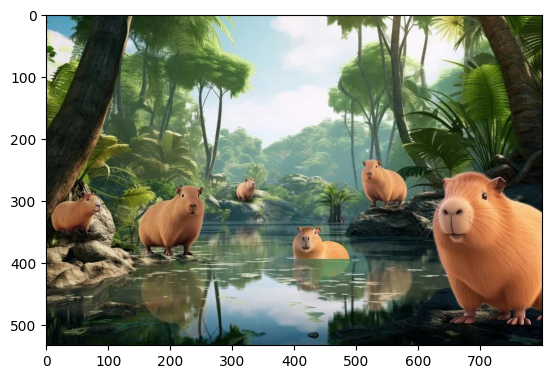

In [3]:
capy_group_photo = Image.open("../data/images/capy.jpg")
plt.imshow(capy_group_photo)

这张照片照的很好, 可惜有一只卡皮巴拉没有来, 突出一个拍照可以, 不拍也行的人设. 不过这也不是问题, 我们可以通过人工智能技术把这只睡过头的卡皮巴拉给P进照片里来. 主要分成以下几个步骤:

1. 找一张这个睡过头的卡皮巴拉的照片.
2. 基于AI进行照片的背景去除, 得到卡皮巴拉的mask (集合).
3. 通过集合运算对两张照片进行组合, 将卡皮巴拉放进集体照中.

### 1. 加载卡皮巴拉照片 

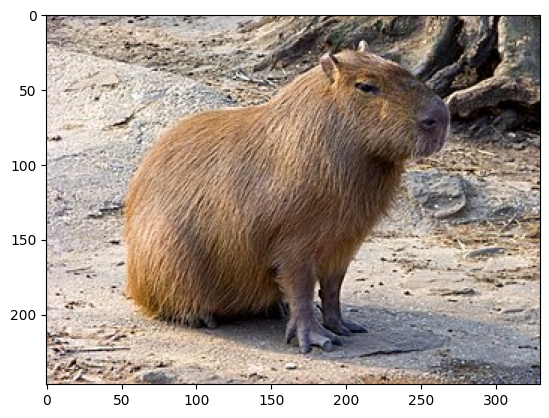

In [5]:
capy1_photo = Image.open("../data/images/capy_miss.jpg")
plt.imshow(capy1_photo)

### 2. 运用 AI 进行背景去除, 得到目标的 mask

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


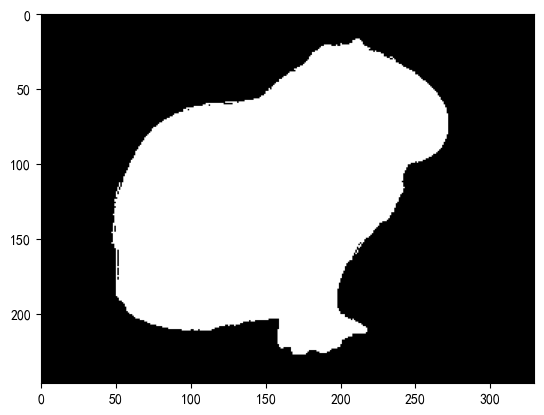

In [111]:

mask = np.bool(rembg.remove(capy1_photo, only_mask=True))
plt.imshow(mask, cmap="gray")
print(np.array(mask))

展示扣出来的卡皮巴拉效果.

In [6]:

capy1 = capy1_photo * mask[:, :, np.newaxis]
plt.imshow(capy1)

NameError: name 'mask' is not defined